In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [3]:
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(data):
    return ' '.join([reverse_word_index.get(idx - 3, '?') for idx in data])

print decode_review(train_data[1])

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [4]:
def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results
X_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels, dtype='float32')
X_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels, dtype='float32')

In [5]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.5452 - acc: 0.7300 - val_loss: 0.3545 - val_acc: 0.8733
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3317 - acc: 0.8746 - val_loss: 0.2863 - val_acc: 0.8885
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2480 - acc: 0.9081 - val_loss: 0.2895 - val_acc: 0.8824
Epoch 4/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1928 - acc: 0.9287 - val_loss: 0.2747 - val_acc: 0.8902
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1546 - acc: 0.9459 - val_loss: 0.2975 - val_acc: 0.8901
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1237 - acc: 0.9569 - val_loss: 0.3355 - val_acc: 0.8873
Epoch 7/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.0998 - acc: 0.9659 - val_loss: 0.3525 - val_acc

In [29]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)

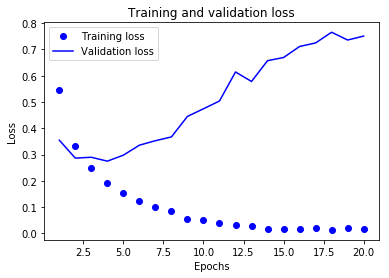

In [30]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

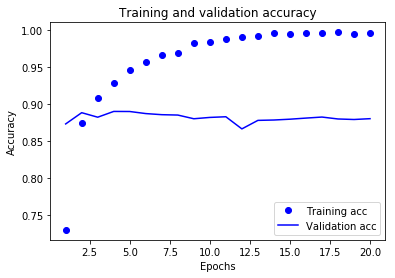

In [31]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
#               loss=keras.losses.binary_crossentropy,
#               metrics=[keras.metrics.binary_accuracy])

history = model.fit(X_train, y_train)
results = model.evaluate(X_test, y_test)

Epoch 1/1
25000/25000 [==============================] - 2s 70us/step


In [33]:
print results

[0.30658745475769045, 0.87428]
